## Projet Analyse Numérique

In [1]:
import random
from matplotlib.colors import LightSource
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator

### Optimisation d'une fonction d'une variable réelle

Question B.1

> Dans une premiere partie nous allons programmer deux méthodes similaires pour retroiver un valeur approché de son minimum. La premiere méthode est celle de balayage a pas constant, et la deuxieme, balayage aléatoire. On défini la fonction et les deux méthodes, ainsi qu'une fonction mf que sera la fonction opposé de f, avec laquelle en lui appliquand les méthodes de recherche de minimum, on obtiendra le maximum.

In [2]:
# Methodes de balayage pour chercher le minimum

def f(x):
    return pow(x, 3) - 3 * pow(x, 2) + 2 * x + 5

def mf(x):
    return -(pow(x, 3) - 3 * pow(x, 2) + 2 * x + 5)

def chercheMinPasConstant(f, a, b, n):
    dx = abs(b - a) / n
    min = f(a)
    for i in range(n):
        if(f(a + dx * i) < min):
            min = f(a + dx * i)
    return min

def BalAlea(f,a,b,N):
    Val = f(a+ (b-a)*random.random())
    for i in range(N+1):
        N = f(a+(b-a)*random.random())
        if(Val>N):
            Val=N
    return Val

Question B.2

In [3]:
print(chercheMinPasConstant(f,0,3,1000))
print(BalAlea(f,0,3,1000))    

4.6151005519999995
4.615109720489803


On retrouve des valeurs proches, mais ils ne sont quand meme pas le meme nombre. Pour voir quelle méthode est plus précis, dans la partie prochaine on cherchera les courbes d'erreur des deux méthodes.

Question B.3

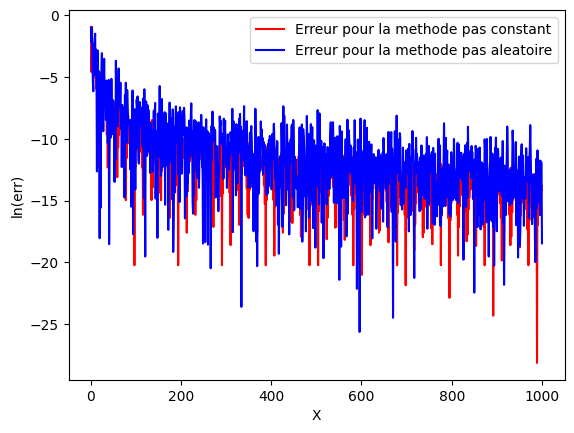

In [4]:
#À calculer à la main 
minreelle = f((6 + np.sqrt(12)) / 6)
n = 1000
a = 0
b = 3

pasConstantErreur = []
aleatoireErreur= []

for i in range(n):
    pasConstantErreur.append(abs(minreelle - chercheMinPasConstant(f, a, b, i + 1)))
    aleatoireErreur.append(abs(minreelle - BalAlea(f, a, b, i + 1)))

X = [(k + 1) for k in range(n)]

plt.plot(X, np.log(pasConstantErreur), 'r-', label="Erreur pour la methode pas constant")
plt.plot(X, np.log(aleatoireErreur), 'b-', label="Erreur pour la methode pas aleatoire")
plt.ylabel('ln(err)')
plt.xlabel ('X')
plt.legend()
plt.show()

Nous remarquons que les deux courbes d'erreur sont relativement similaires pour $n = 1000$, mais la courbe de la méthode a pas constant semble prendre des valeurs plus négatives ainsi étant plus précis. En diminuant $n$ (par exemble $n = 200$) on voit des piques de valeurs tres bas en log, mais il est possible que ce caractéristique soit liée a la nature de la fonction, ainsi on ne peut pas conclure qu'une méthode est mieux que l'autre.

Question B.4

On peut ici chercher le minimum de la fonction opposé de la fonction f, en faisant attention de prendre l'opposé puisqu'on a pris l'opposé de la fonction.

In [5]:
# pour chercher le maximum de f avec la meme methode
# mf représente -f
print(-chercheMinPasConstant(mf, a, b, n))
print(-BalAlea(mf, a, b, n))

10.967053972999995
10.99776739032983


Question B.5 
> Pour chaque iteration de $n$ on ajoute ou enleve de la valeur de x dans la direction du minimum. En fait la dérivée $f'(x_{n})$ montre la pente de la fonction en la valeur $x_{n}$ donc la direction du minimim, ainsi en le multipliant par $u < 0$ adaptée et ce ajoutant au $x_{n}$ on s'apporche du minimum.

Question B.6

In [6]:
# méthodes du gradiant 1D

x0 = a + (b - a) * random.random()

u = -0.01  #t = -0.28876 pour optimale

def fder(x):
    return (3 * math.pow(x, 2) - 6 * x + 2)

for i in range(n):
    if(i == 0):
        xnp1 = x0 + u * fder(x0)
    else:
        xnp1 = xnp1 + u * fder(xnp1)
        #print(xnp1)

print(f(xnp1))
print("xnp1" , xnp1)

4.615099820540249
xnp1 1.5773502691896224


Question B.7

In [7]:
#B.7.a# -----------------

def fder2(x): #f''(x)
    return 6 * x - 6

def phi(t): #𝜑(t)
    return f(xnp1 + t * fder(xnp1))

def phider(t):#𝜑'(t)
    return (fder(xnp1 + t * fder(xnp1)) * fder(xnp1))

def phider2(t): #𝜑''(t)
    return (fder2(xnp1 + t * fder(xnp1)) * math.pow(fder(xnp1), 2))

print(phider(0))
print(phider2(0))

#B.7.b# -----------------

def phiDL(t): 
    return phider(0) + phider2(0) * t

#t = (-phider(0)/phider2(0))


1.135959703518257e-28
3.9350798436889757e-28


On obtient des valeur proche de 0 des fonctions $\varphi'(0)$ et $\varphi''(0)$, ce qui nous indique que la valeur minimale a été atteinte de $f$. On obtient un valeur minimale pour une valeur de $t = -\frac{\varphi'(t)}{\varphi''(t)}$ a chaque pas. On retrouve la méthode de Newton.

### Optimisation d'une fonction de deux variables réelles

> Dans cette partie on va rechercher les minimum des fonctions:
 - $g_{a,b}(x, y) = \frac{x^2}{a} + \frac{y^2}{b}$
 - $h(x, y) = cos(x)sin(y)$

Question C.8

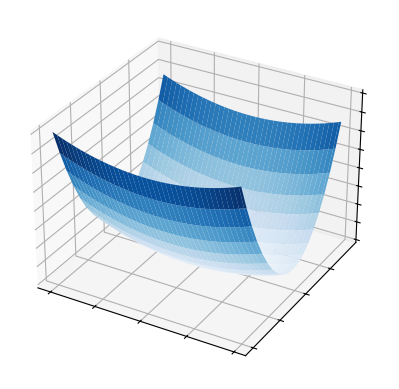

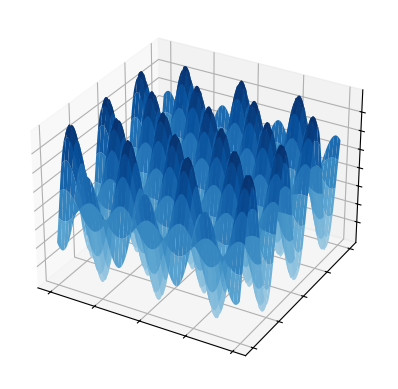

In [8]:
def g(x, y, a, b):
    return (pow(x, 2) / a) + pow(y, 2) / b

def h(x, y):
    A = np.cos(x)
    B = np.sin(y)
    return (A)*(B)

x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10)

a = 2
b = 2/7

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x, y = np.meshgrid(x, y)

z =  g(x, y, a, b)

# Customize the z axis.
ax.plot_surface(x, y, z, vmin=z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

x1 = np.arange(-10, 10, 0.1)
y1 = np.arange(-10, 10, 0.1)
x1, y1 = np.meshgrid(x1, y1)
z1 = h(x1, y1)

fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
ax1.plot_surface(x1, y1, z1, vmin=z1.min() * 2, cmap=cm.Blues)
ax1.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
plt.show()


Question C.9

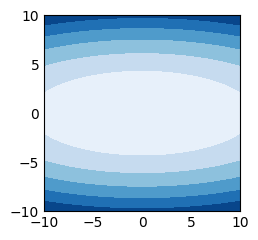

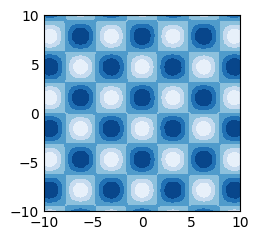

In [9]:
plt.style.use('_mpl-gallery-nogrid')
#G
# make data
X, Y = np.meshgrid(np.linspace(-10,10), np.linspace(-10,10))
Z = g(X,Y, 2,2/7)
levels = np.linspace(Z.min(), Z.max(), 7)

# plot
fig, ax = plt.subplots()

ax.contourf(X, Y, Z, levels=levels)

plt.show()
#H
Z = h(X,Y)
levels = np.linspace(Z.min(), Z.max(), 7)

# plot
fig, ax = plt.subplots()

ax.contourf(X, Y, Z, levels=levels)

plt.show()

Question C.10

Les gradients sont:
$$\overrightarrow{\nabla g_{a,b}(x, y)} = \left( \frac{2x}{a}, \frac{2y}{b} \right)$$
$$\overrightarrow{\nabla h(x, y)} = \left( - sin(x)sin(y), cos(x)cos(y)\right)$$

In [10]:
def gradg(x, y, a, b):
    return((2*x)/a , (2*y)/b)

def gradh(x, y):
    return (-np.sin(x)*np.sin(y), np.cos(x)* np.cos(y))

Question C.11

In [11]:
a = 2
b = 2/7

point = (0, 1)
point2 = (1, 1)

print(gradg(point[0], point[1], a, b))
print(gradh(point[0], point[1]))
print(np.linalg.norm(gradg(point[0], point[1], a, b)))

(0.0, 7.0)
(-0.0, 0.5403023058681398)
7.0


Question C.12

In [12]:

#pas constant

def gradpc(eps, MaxIter, u, x0, y0, df1, df2, a, b):
    index = 0
    points = []
    (xnp1, ynp1) = np.array((x0, y0))
    points.append((xnp1, ynp1))
    while(eps < np.linalg.norm((df1(xnp1, ynp1, a, b), df2(xnp1, ynp1, a, b))) and index < MaxIter):
        index+=1
        (xnp1, ynp1) = (xnp1, ynp1) + u * np.array((df1(xnp1, ynp1, a, b), df2(xnp1, ynp1, a, b)))
        points.append((xnp1, ynp1))
    return points


def gradpc2(eps, MaxIter, u, x0, y0, df1, df2):
    index = 0
    points = []
    (xnp1, ynp1) = np.array((x0, y0))
    points.append((xnp1, ynp1))
    while(eps < np.linalg.norm((df1(xnp1, ynp1), df2(xnp1, ynp1))) and index < MaxIter):
        index+=1
        (xnp1, ynp1) = (xnp1, ynp1) + u * np.array((df1(xnp1, ynp1), df2(xnp1, ynp1)))
        points.append((xnp1, ynp1))
    return points


Question C.13

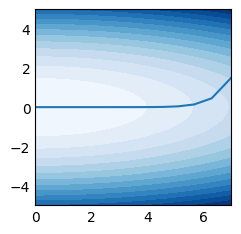

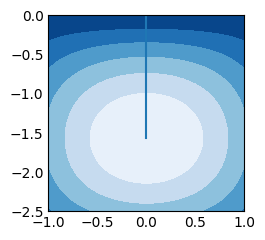

In [13]:
(x01, y01) = (0, 0)

#derivée partielle par rapport a x de g
def dpgx(x, y, a, b):
    return ((2*x)/a)

#derivée partielle par rapport a y de g
def dpgy(x, y, a, b):
    return (2*y)/b

def dphx(x, y):
    return -np.sin(x)*np.sin(y)

def dphy(x, y):
    return np.cos(x)* np.cos(y)

a = 2
b = 2/7

pointsg = gradpc(10**-5, 120, -0.1, 7, 1.5, dpgx, dpgy, a, b)
pointsh = gradpc2(10**-5, 120, -0.1, 0, 0, dphx, dphy)


#G
xs = [x[0] for x in pointsg]
ys = [y[1] for y in pointsg]
Xg, Yg = np.meshgrid(np.linspace(0,7), np.linspace(-5,5))
Zg = g(Xg,Yg, 2,2/7)
levelsG = np.linspace(Zg.min(), Zg.max(), 15)

figg, axg = plt.subplots()

axg.contourf(Xg, Yg, Zg, levels=levelsG)
axg.plot(xs, ys)
plt.plot()
plt.show()

#H
xs = [x[0] for x in pointsh]
ys = [y[1] for y in pointsh]
X, Y= np.meshgrid(np.linspace(-1,1), np.linspace(-2.5,0))
Z = h(X,Y)
levels = np.linspace(Z.min(), Z.max(), 7)

fig, ax = plt.subplots()

ax.contourf(X, Y, Z, levels=levels)
ax.plot(xs, ys)
plt.plot()
plt.show()

Question C.14

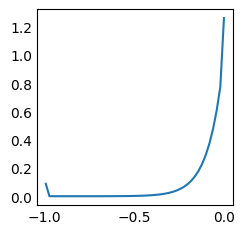

In [14]:
def gradG(eps, MaxIter, u, x0, y0, df1, df2):
    a = 1
    b = 20
    index = 0
    points = []
    (xnp1, ynp1) = np.array((x0, y0))
    while(eps < np.linalg.norm((df1(xnp1, ynp1, a, b), df2(xnp1, ynp1, a, b))) and index < MaxIter):
        index += 1
        (xnp1, ynp1) = (xnp1, ynp1) + u * np.array((df1(xnp1, ynp1, a, b), df2(xnp1, ynp1, a, b)))
    return (xnp1, ynp1)

a = 1
b = 20
eps = 10**(-5)
maxiter = 120
u = np.linspace(-0.99, -0.001, 50)
valeur_reel = (0, 0)
pointsg = [np.linalg.norm(gradG(10**-5, 120, i, 1, 1, dpgx, dpgy)) for i in u]
plt.plot(u,pointsg)
plt.show()

On constate que pour les valeurs proches de $0$ (la ou la courbe monte) l'erreur est de plus en plus grand, indiquant que la méthode n'arrive pas au minimum de la fonction. Également vers les valeurs proches de $-1$ la méthode ne trouve pas le minimum. Ainsi les valeurs de $u$ optimales sont la ou la courbe est presque horizontale.

Question C.15

In [15]:
def neug(c, a, b):
    return (pow(c[0], 2) / a) + pow(c[1], 2) / b

def neuh(c):
    return h(c[0],c[1])

def gradamax(eps, MaxIter, u, x0, y0, f, df1, df2):
    a = 2
    b = 2/7
    k = 0
    
    (xnp1, ynp1) = (x0, y0)
    grad = np.array((df1(xnp1, ynp1, a, b), df2(xnp1, ynp1, a, b)))
    F1 = f((xnp1, ynp1) + k * np.abs(u) * grad, a, b)
    F2 = f((xnp1, ynp1) + (k + 1) * np.abs(u) * grad, a, b)

    while(F1 < F2 and k < MaxIter and eps < np.linalg.norm(grad)):
        k += 1   
        (xnp1, ynp1) = ((xnp1, ynp1) + (k + 1) * np.abs(u) * grad)
        F1 = f((xnp1, ynp1) + k * np.abs(u) * grad, a, b)
        F2 = f((xnp1, ynp1) + (k + 1) * np.abs(u) * grad, a, b)

    return (xnp1, ynp1)

def gradamax2(eps, MaxIter, u, x0, y0, f, df1, df2):
    k = 0
    (xnp1, ynp1) = (x0, y0)
    grad = np.array((df1(xnp1, ynp1), df2(xnp1, ynp1)))
    F1 = f((xnp1, ynp1) + k * np.abs(u) * grad)
    F2 = f((xnp1, ynp1) + (k + 1) * np.abs(u) * grad)

    while(F1 < F2 and k < MaxIter and eps < np.linalg.norm(grad)):
        k += 1   
        (xnp1, ynp1) = ((xnp1, ynp1) + (k + 1) * np.abs(u) * grad)
        F1 = f((xnp1, ynp1) + k * np.abs(u) * grad)
        F2 = f((xnp1, ynp1) + (k + 1) * np.abs(u) * grad)

    return (xnp1, ynp1)

point = gradamax2(10**-5, 120, -0.01, 1.5, 1.5, neuh, dphx, dphy)
print(point)

(-0.012394297416338268, 1.5076057025836613)


Le point obtenue semble cohérent avec la courbe de niveau que nous avons obtenue dans la question 9

Question C.16

In [16]:
def gradamin(eps, MaxIter, u, x0, y0, f, df1, df2):
    k = 0
    (xnp1, ynp1) = (x0, y0)
    grad = np.array((df1(xnp1, ynp1), df2(xnp1, ynp1)))
    F1 = f((xnp1, ynp1) + k * u * grad)
    F2 = f((xnp1, ynp1) + (k + 1) * u * grad)

    while(F1 > F2 and k < MaxIter and eps < np.linalg.norm((df1(xnp1, ynp1), df2(xnp1, ynp1)))):
        k += 1   
        (xnp1, ynp1) = ((xnp1, ynp1) + (k + 1) * u * grad)
        F1 = f((xnp1, ynp1) + k * u * grad)
        F2 = f((xnp1, ynp1) + (k + 1) * u * grad)
        
    return [k, xnp1, ynp1]

eps = 10**-5
maxiter = 120
u = -0.01
print(gradamin(eps, maxiter, u, 0, 0, neuh, dphx, dphy))


[16, 0.0, -1.5199999999999998]


Le résultat obtenu est cohérent avec la courbe retrouvée pour la question 13.

Question C.17

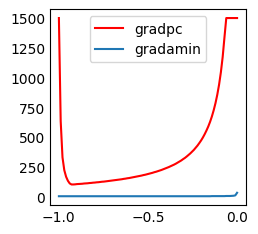

In [17]:
def gradG(eps, MaxIter, u, x0, y0, df1, df2):
    a = 1
    b = 20
    index = 0
    (xnp1, ynp1) = np.array((x0, y0))
    while(eps < np.linalg.norm((df1(xnp1, ynp1, a, b), df2(xnp1, ynp1, a, b))) and index < MaxIter):
        index += 1
        (xnp1, ynp1) = (xnp1, ynp1) + u * np.array((df1(xnp1, ynp1, a, b), df2(xnp1, ynp1, a, b)))
    return [index, xnp1, ynp1]

'''
def gradpc(eps, MaxIter, u, x0, y0, df1, df2, a, b):
    index = 0
    points = []
    (xnp1, ynp1) = np.array((x0, y0))
    points.append((xnp1, ynp1))
    while(eps < np.linalg.norm((df1(xnp1, ynp1, a, b), df2(xnp1, ynp1, a, b))) and index < MaxIter):
        index+=1
        (xnp1, ynp1) = (xnp1, ynp1) + u * np.array((df1(xnp1, ynp1, a, b), df2(xnp1, ynp1, a, b)))
        points.append((xnp1, ynp1))
    return points
'''

def neug(c):
    a=1
    b=20
    return (pow(c[0], 2) / a) + pow(c[1], 2) / b

def neudpgx(x,y):
    a=1
    b=20
    return dpgx(x,y,a,b)
def neudpgy(x,y):
    a=1
    b=20
    return dpgy(x,y,a,b)

u = np.linspace(-0.999, -0.001, 100)

xmethode1 = [gradG(10**-5, 1500, m, 7, 1.5, dpgx, dpgy)[0] for m in u]
xmethode2 = [gradamin(10**-5, 1500, m, 7, 1.5, neug, neudpgx, neudpgy)[0] for m in u]

plt.plot(u, xmethode1, label = 'gradpc', color = "red")
plt.plot(u, xmethode2, label = 'gradamin')
plt.legend()
plt.show()

Les résultats sont similaires a celle dans la question $14$. On remarque par contre que la méthode a pas constant a une besoin de nombre d'iteration largement supérieur a la méthode améliorée.

### Calcule de l'inverse d'une matrice

#### Question 18.

Lorsque $n = 1$ on a 
$$y_{k + 1} = y_k - \rho_k G(y_k) $$
avec
$$\rho_k = \frac{||f'(y)||^2}{2  A \cdot  f'(y)^2} = \frac{1}{2A}$$
or ici $A$ étant un scalaire, $rho_k$ représente un scalaire.
Ainsi, on retrouve
$$x_{n+1} = x_n + uf'(x_n)$$
sous forme de 
$$y_{n+1} = y_n - \rho_kf'(y_n)$$
si on suppose l'égalité $u = - \rho_k$ a un changement de variable pres.
 

#### Question 19.

In [33]:
def gpo(y, A, b, eps):
    index = 0
    y_k = y
    G_yk = 2 * (A * y_k - b)
    rho_k = (np.linalg.norm(G_yk)**2) / (2 * np.transpose(G_yk) * A * G_yk)  if G_yk.any() != 0 else 0
    y_kp1 = y_k - rho_k[0, 0] * G_yk
    while(index < 130 and eps < np.linalg.norm(y_kp1 - y_k)):
        index += 1
        y_k = y_kp1
        G_yk = 2 * (A * y_k - b)
        rho_k = (np.linalg.norm(G_yk)**2) / (2 * np.transpose(G_yk) * A * G_yk)  if G_yk.any() != 0 else 0
        y_kp1 = y_k - rho_k[0, 0] * G_yk
    return [index, y_kp1]

def gpo2(y, A, b, eps):
    index = 0
    y_k = y
    G_yk = 2 * (A * y_k - b)
    rho_k = (np.linalg.norm(G_yk)**2) / (2 * np.transpose(G_yk) * A * G_yk)  if G_yk.all() != 0 else 0
    y_kp1 = y_k - rho_k * G_yk
    while(index < 130 and eps < np.linalg.norm(y_kp1 - y_k)):
        index += 1
        y_k = y_kp1 
        rho_k = (np.linalg.norm(G_yk)**2) / (2 * np.transpose(G_yk) * A * G_yk)  if G_yk.all() != 0 else 0
        G_yk = 2 * (A * y_k - b)
        y_kp1 = y_k - rho_k * G_yk
    return [index, y_kp1]


#### Question 20.

> Pour tester la fonction g on peut retrouver la matrice $A$ et le vecteur $\textbf{\textit{b}}$ en faisant l'égalité:
$$g_{a, b}(x, y) = \textbf{y}^TA\textbf{y} - 2\textbf{y}^T\textbf{b}$$
ainsi obtenant:
$$A = 
\begin{pmatrix}
    \frac{1}{a}  & 0 \\
    0  & \frac{1}{b}
\end{pmatrix}

\quad 

\textbf{b} = 
\begin{pmatrix}
    0 \\
    0
\end{pmatrix}
$$

In [25]:
a = 1
b = 20
alpha = 1/a
gamma = 1/b
        
A_2d = np.matrix(f'{alpha} 0; 0 {gamma}')

y = np.matrix('1; 1')
bm = np.matrix('0; 0')

print(y)

gpo(y, A_2d, bm, 10**-5)

[[1]
 [1]]


[6,
 matrix([[0.00000000e+00],
         [4.94729682e-10]])]

On obtient alors le point $(0, 0)$ qui est cohérent avec tout ce qu'on a vu jusqu'a maintenant.

### Application a des problemes de transfert de la chaleur

$
    \forall x \in \left] 0, 1 \right[ \ \ -\frac{d^2T}{dx^2}(x) + c(x)T(x) = f(x) \\ T(0) = a, T(1) = b \\
    c = 0, f = 0 \implies -\frac{d^2T}{dx^2}(x) = 0 \implies \frac{d^2T}{dx^2}(x) = 0 
$

On peut approximer $\frac{d^2T}{dx^2}(x_i) \approx \frac{T(x_i + dx) - 2 \cdot T(x_i) + T(x_i - dx)}{dx^2}$



ainsi obtenant
$ \frac{1}{dx^2} \cdot 
    \left(
    \begin{pmatrix}
        2 & -1 & 0 & 0 & \cdots & 0 \\
        -1 & 2 & -1 & 0 & \cdots & 0 \\
        0 & -1 & 2 & -1 & \cdots & 0 \\
        \vdots & \vdots & \ddots & \ddots & \ddots & 0 \\
        & & & & & \\
        0 & 0 & 0 & 0 & -1 & 2 
    \end{pmatrix} \cdot
    \begin{pmatrix}
        T(x_1) \\
        T(x_2) \\ 
        T(x_3) \\
        \vdots \\
        T(x_n)
    \end{pmatrix}
    - 
    \begin{pmatrix}
        a \\
        0 \\ 
        0 \\
        \vdots \\
        b
    \end{pmatrix}
    \right)
     = 0
$

$$
    \Rightarrow

    \begin{pmatrix}
        2 & -1 & 0 & 0 & \cdots & 0 \\
        -1 & 2 & -1 & 0 & \cdots & 0 \\
        0 & -1 & 2 & -1 & \cdots & 0 \\
        \vdots & \vdots & \ddots & \ddots & \ddots & 0 \\
        & & & & & \\
        0 & 0 & 0 & 0 & -1 & 2 
    \end{pmatrix} \cdot
    \begin{pmatrix}
        T(x_1) \\
        T(x_2) \\ 
        T(x_3) \\
        \vdots \\
        T(x_n)
    \end{pmatrix}

    = 

    \begin{pmatrix}
        a \\
        0 \\ 
        0 \\
        \vdots \\
        b
    \end{pmatrix}
$$

On reconnait une forme $Ay = b$ ou les $y$ représentent $T(x)$. Ainsi on peut appliquer la méthode de gradiant a pas optimale.

qui est une équation de forme $Ax = b$. Or l'équation la est fausse puisque les informations contenue dans $x_1$ et $x_n$ ne contient pas $a$ et $b$. Ainsi on pourrait envisager une matrice ou on ajoute une colonne au début et au fin, comme ceci:

$
    \begin{pmatrix}
        1 & -2 & 1 & 0 & 0 & \cdots & 0 & 0 \\
        0 &1 & -2 & 1 & 0 & \cdots & 0 & 0\\
        0 & 0 & 1 & -2 & 1 & \cdots & 0 & 0\\
        \vdots &\vdots & \vdots & \ddots & \ddots & \ddots & 0 &0\\
        & & & & & & &\\ 
        0 & 0 & 0 & 0 & 0 & 1 & -2 & 1
    \end{pmatrix} \cdot
$

la multipliant avec
$
    \begin{pmatrix}
        a \\
        T(x_1) \\
        T(x_2) \\ 
        T(x_3) \\
        \vdots \\
        T(x_n)\\
        b
    \end{pmatrix} = 0
$

mais cette matrice n'est pas symmetrique, elle n'est meme pas carrée. On peut essayer d'ajouter des lignes de 0 en haut et en bas, mais la matrice ainsi devient non-inversible. Cette méthode n'est donc pas appliquable.

On peut envisager une deuxieme méthode ou on essayerai de poser que $\phi(x) = T(x)$, ce qui ne marche pas mathématiquement, puisqu'on obtient un $A$ nulle, ce qui est logique, vue que $T$ est une droite que n'a pas de minimum. En fait la méthode cherche un minimum sur $\mathbb{R^n}$  entier tendis que nous le cherchons sur $[0, 1]$ ainsi, on ne peut pas appliquer cette méthode.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


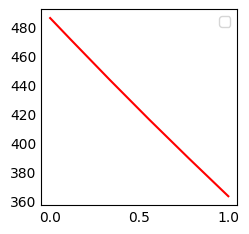

In [43]:
N = 10
dx = 1 / (N + 1)
xs = np.linspace(dx, 1 - dx, N)

A = np.diag([2 for k in range(N)]) + np.diag([-1 for k in range (N-1)], -1) + np.diag([-1 for k in range (N-1)], 1)

a = 500
b = 350

xpp = np.linspace(0, 1, N)

vector = np.array(np.ones(N))
y = np.matrix(xpp[:, np.newaxis])
vector = np.array(np.zeros(N))
B = np.matrix(vector[:, np.newaxis])
B[0][0] = a
B[N-1][0] = b


'''
B = np.zeros(N)
B[0] = a
B[N-1] = b

y = np.linalg.solve(A, B)
'''
y = gpo(y, A, B, 10**-5)

#y = gpo2(xpp, A, B, 10**-5)

plt.plot(xpp, y[1], color = "red")
plt.legend()
plt.show()

On remarque ici, que pour les grandes valeurs de N, la méthode arrete de fonctionner et on obtient une parabole a lieu d'une droite. Mais pour les valeurs faibles (autour de 10) la méthode a l'aire de bien fonctionner.

#### Question 22.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


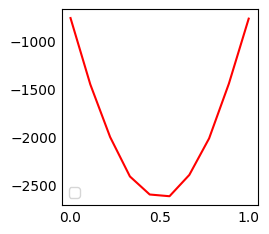

In [60]:
a = 500
b = 350
T_a = 300
c = 10
f = c*T_a

N = 10
dx = 1 / (N + 1)
xs = np.linspace(dx, 1 - dx, N)

A = np.diag([2 - c * (np.power(dx, 2)) for k in range(N)]) + np.diag([-1 for k in range (N-1)], -1) + np.diag([-1 for k in range (N-1)], 1)

xpp = np.linspace(0, 1, N)

vector = np.array(np.ones(N))
y = np.matrix(xpp[:, np.newaxis])
vector = np.array(-f * np.ones(N))
B = np.matrix(vector[:, np.newaxis])
B[0][0] = B[0][0] - a
B[N-1][0] = B[N-1][0] - b
B =  B * (np.power(dx, 2)) 

y = gpo(y, A, B, 10**-5)

plt.plot(xpp, y[1], color = "red")
plt.legend()
plt.show()
